In [ ]:
import requests
import xml.etree.ElementTree as ET
import csv

def download_full_content(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            return response.text
        else:
            return "Failed to download"
    except Exception as e:
        return f"Error: {str(e)}"

def fetch_arxiv_data():
    url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": "all:quantum computing",
        "start": 0,
        "max_results": 500
    }
    response = requests.get(url, params=params)


    if response.status_code != 200:
        print(f"Eroare la API: {response.status_code}")
        return

    root = ET.fromstring(response.text)
    ns = {'arxiv': 'http://www.w3.org/2005/Atom'}


    dataset = []

    for i, entry in enumerate(root.findall('arxiv:entry', ns)):
        title = entry.find('arxiv:title', ns).text.strip()
        authors = ", ".join(author.find('arxiv:name', ns).text for author in entry.findall('arxiv:author', ns))
        published = entry.find('arxiv:published', ns).text
        summary = entry.find('arxiv:summary', ns).text.strip()
        content_link = entry.find('arxiv:id', ns).text


        full_content = download_full_content(content_link)


        dataset.append({
            "Index": i + 1,
            "Title": title,
            "Authors": authors,
            "Published": published,
            "Summary": summary,
            "Content": full_content
        })


    output_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing.csv"
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["Index", "Title", "Authors", "Published", "Summary", "Content"])
        writer.writeheader()
        writer.writerows(dataset)

    print(f"Datele au fost salvate în {output_file}")


fetch_arxiv_data()


Datele au fost salvate în /content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing.csv


In [ ]:
pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
import requests
import xml.etree.ElementTree as ET
import csv
import io
from PyPDF2 import PdfReader

# Funcție pentru a descărca și extrage text din PDF
def download_pdf_and_extract_text(pdf_url):
    try:
        response = requests.get(pdf_url)
        if response.status_code == 200:
            # Deschidem PDF-ul din memorie
            pdf_file = io.BytesIO(response.content)
            pdf_reader = PdfReader(pdf_file)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text()
            return text.strip() if text else "No text extracted"
        else:
            return "Failed to download PDF"
    except Exception as e:
        return f"Error: {str(e)}"

# Funcție principală
def fetch_arxiv_data():
    # Setarea URL-ului API-ului ArXiv
    url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": "all:quantum computing",
        "start": 0,
        "max_results": 500
    }
    response = requests.get(url, params=params)

    # Verificarea răspunsului
    if response.status_code != 200:
        print(f"Eroare la API: {response.status_code}")
        return

    # Parsează XML-ul
    root = ET.fromstring(response.text)
    ns = {'arxiv': 'http://www.w3.org/2005/Atom'}

    # Structura pentru date
    dataset = []

    # Iterăm prin fiecare intrare
    for i, entry in enumerate(root.findall('arxiv:entry', ns)):
        title = entry.find('arxiv:title', ns).text.strip()
        authors = ", ".join(author.find('arxiv:name', ns).text for author in entry.findall('arxiv:author', ns))
        published = entry.find('arxiv:published', ns).text
        summary = entry.find('arxiv:summary', ns).text.strip()

        # Găsim link-ul către PDF cu titlul "pdf"
        pdf_link = entry.find('.//arxiv:link[@title="pdf"]', ns)
        pdf_url = pdf_link.attrib['href'] if pdf_link is not None else None

        # Descărcăm și extragem textul din PDF (dacă există link)
        pdf_text = download_pdf_and_extract_text(pdf_url) if pdf_url else "No PDF available"

        # Adăugăm în dataset
        dataset.append({
            "Index": i + 1,
            "Title": title,
            "Authors": authors,
            "Published": published,
            "Summary": summary,
            "PDF_Content": pdf_text
        })

    # Salvăm dataset-ul într-un fișier CSV
    output_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"
    # with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    #     writer = csv.DictWriter(file, fieldnames=["Index", "Title", "Authors", "Published", "Summary", "PDF_Content"])
    #     writer.writeheader()
    #     writer.writerows(dataset)
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(
        file,
        fieldnames=["Index", "Title", "Authors", "Published", "Summary", "PDF_Content"],
        escapechar='\\',
        quoting=csv.QUOTE_MINIMAL
        )
        writer.writeheader()
        writer.writerows(dataset)
    print(f"Datele au fost salvate în {output_file}")

# Rulăm funcția
fetch_arxiv_data()


Datele au fost salvate în /content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv


In [ ]:
import csv
import sys

# Mărim limita câmpurilor
csv.field_size_limit(sys.maxsize)

# Numele fișierului CSV
csv_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

def count_entries_in_csv(file_name):
    try:
        with open(file_name, mode='r', encoding='utf-8') as file:
            content = file.read().replace('\x00', '')  # Eliminăm caracterele NUL
            lines = content.splitlines()
            reader = csv.DictReader(lines)
            entries = list(reader)
            print(f"Numărul de intrări în fișierul CSV: {len(entries)}")
    except FileNotFoundError:
        print(f"Fișierul {file_name} nu a fost găsit.")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

# Rulăm funcția
count_entries_in_csv(csv_file)



Numărul de intrări în fișierul CSV: 466


In [ ]:
pip install lambeq qiskit pandas

Evaluating checksum: 0.0%|          |0.000/1.533GB [00:00<?]

Extracting model...


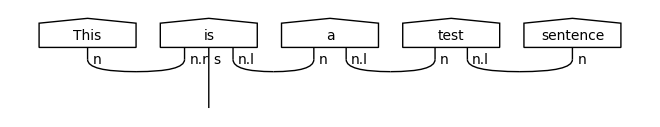

In [ ]:
from lambeq import BobcatParser

parser = BobcatParser()
diagram = parser.sentence2diagram('This is a test sentence')
diagram.draw()

In [ ]:
from lambeq import SpacyTokeniser, SpacyLemmatizer, SpacyStopwordRemover, BobcatParser
import csv

# Inițializează instrumentele de procesare
tokeniser = SpacyTokeniser()
lemmatizer = SpacyLemmatizer()
stopword_remover = SpacyStopwordRemover()

# Exemplu de articole (înlocuiește cu datele tale din CSV)
articles = [
    "Quantum computing is a revolutionary field in technology.",
    "The future of artificial intelligence is uncertain."
]

# Deschide un fișier CSV pentru a salva rezultatele
with open('quantum_processed_articles.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Article', 'Tokens', 'Lemmatized Tokens', 'Stopwords Removed', 'Processed Article'])  # Header

    for article in articles:
        # Tokenizarea propoziției
        tokens = tokeniser.tokenise_sentence(article)

        # Lematizarea tokenurilor
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Eliminarea cuvintelor de oprire
        filtered_tokens = [token for token in lemmatized_tokens if not stopword_remover.is_stopword(token)]

        # Reconstructia articolului după eliminarea stopword-urilor
        processed_article = ' '.join(filtered_tokens)

        # Salvează articolul, tokenurile, tokenurile lematizate, cuvintele fără stopwords și articolul procesat
        writer.writerow([article, tokens, lemmatized_tokens, filtered_tokens, processed_article])  # Salvează și articolul procesat

print("Procesare finalizată, rezultatele sunt salvate în 'quantum_processed_articles.csv'.")


ImportError: cannot import name 'SpacyLemmatizer' from 'lambeq' (/usr/local/lib/python3.10/dist-packages/lambeq/__init__.py)

In [ ]:
pip install pennylane torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93

In [ ]:
import pennylane as qml
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Funcție pentru codificarea unui text într-un vector cuantic
def quantum_text_embedding(text):
    # Crează un circuit cuantic
    dev = qml.device("default.qubit", wires=2)

    @qml.qnode(dev)
    def circuit():
        # Codifică fiecare cuvânt în vectori cuantici
        for word in text.split():
            # Pentru fiecare cuvânt, aplici un operator cuantic (de exemplu, rotiri)
            qml.Hadamard(wires=0)  # Exemplu simplu, poți extinde aici
            qml.RX(np.pi/4, wires=1)
        return qml.probs(wires=[0, 1])

    return circuit()

# Funcție pentru calcularea similarității dintre două texte
def quantum_similarity(text1, text2):
    # Codifică ambele texte în vectori cuantici
    embedding1 = quantum_text_embedding(text1)
    embedding2 = quantum_text_embedding(text2)

    # Convertește rezultatele cuantice într-o formă clasică pentru a calcula similaritatea
    embedding1_classical = np.array(embedding1).real
    embedding2_classical = np.array(embedding2).real

    # Calculul similarității cosinusului între cele două texte
    return cosine_similarity([embedding1_classical], [embedding2_classical])

# Exemple de texte
#text1 = "Quantum computing is the future of technology." #Quantum Similarity:  0.6969234250586759
text1= "i feel sad"
text2 = "The field of quantum computing is rapidly evolving."

# Calcularea similarității
similarity = quantum_similarity(text1, text2)
print("Quantum Similarity: ", similarity[0][0])


KeyboardInterrupt: 

In [ ]:
import pennylane as qml
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Funcție pentru codificarea unui text într-un vector cuantic
def quantum_text_embedding(text):
    # Crează un circuit cuantic
    dev = qml.device("default.qubit", wires=2)

    @qml.qnode(dev)
    def circuit():
        # Codifică fiecare cuvânt în vectori cuantici
        for word in text.split():
            # Pentru fiecare cuvânt, aplici un operator cuantic (de exemplu, rotiri)
            qml.Hadamard(wires=0)  # Exemplu simplu, poți extinde aici
            qml.RX(np.pi/4, wires=1)
        return qml.state()

    return circuit()

# Funcție pentru calcularea fidelității între două stări cuantice
def quantum_fidelity(state1, state2):
    # Calculează fidelitatea între două stări cuantice
    # state1 = state1 / np.linalg.norm(state1)
    # state2 = state2 / np.linalg.norm(state2)
    overlap = np.abs(np.dot(state1, state2))**2
    return overlap

# Funcție pentru calcularea similarității dintre două texte
def quantum_similarity(text1, text2):
    # Codifică ambele texte în vectori cuantici
    embedding1 = quantum_text_embedding(text1)
    embedding2 = quantum_text_embedding(text2)

    # Calculăm fidelitatea între cele două stări cuantice
    fidelity = quantum_fidelity(embedding1, embedding2)

    return fidelity

# Exemple de texte
#text1 = "Quantum computing is the future of technology."#Quantum Fidelity:  0.4267766952966355
text1 = "i feel sad"
text2 = "The field of quantum computing is rapidly evolving."

# Calcularea similarității
similarity = quantum_similarity(text1, text2)
print("Quantum Fidelity: ", similarity)


Quantum Fidelity:  0.07322330470336286


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Exemple de texte
text1 = "i feel sad."
text2 = "The field of quantum computing is rapidly evolving."

# Aplicăm TF-IDF pentru a transforma textele în vectori
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])

# Calculăm similaritatea cosinus între cele două texte
similarity_tfidf = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"Cosine Similarity (TF-IDF): {similarity_tfidf[0][0]}")


Cosine Similarity (TF-IDF): 0.0


In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Încarcă modelul BERT pre-antrenat și tokenizer-ul
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Funcție pentru a obține embeddings de la BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Exemple de texte
text1 = "nothing."
text2 = "The field of quantum computing is rapidly evolving."

# Obține embeddings pentru fiecare text
embedding1 = get_bert_embeddings(text1)
embedding2 = get_bert_embeddings(text2)

# Calculăm similaritatea cosinus între embeddings
similarity_bert = cosine_similarity([embedding1.numpy()], [embedding2.numpy()])
print(f"Cosine Similarity (BERT): {similarity_bert[0][0]}")


Cosine Similarity (BERT): 0.39870601892471313


In [ ]:
import pennylane as qml
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Creăm un dispozitiv cuantic
dev = qml.device("default.qubit", wires=4)  # folosim 4 qubiți pentru a reprezenta cuvintele din text

# Funcție pentru codificarea unui cuvânt într-un embedding cuantic
def quantum_embedding(word):
    # Folosim un circuit cuantic pentru a genera un embedding cuantic
    @qml.qnode(dev)
    def circuit():
        # Codificăm cuvântul printr-un set de operații cuantice
        qml.Hadamard(wires=0)
        qml.RX(np.pi / 4, wires=1)
        qml.RY(np.pi / 2, wires=2)
        qml.RZ(np.pi / 3, wires=3)
        return qml.state()

    # Executăm circuitul pentru a obține starea cuantică
    state = circuit()
    # Returnăm doar partea reală a stării cuantice
    return np.real(state)

# Funcție pentru calcularea similarității cosinus între două embedding-uri cuantice
def quantum_similarity(embedding1, embedding2):
    # Calculăm similaritatea cosinus între cele două embedding-uri
    return cosine_similarity([embedding1], [embedding2])

# Funcție pentru a codifica un text întreg într-un set de embedding-uri cuantice
def encode_text(text):
    # Împărțim textul în cuvinte și generăm embedding-uri cuantice pentru fiecare cuvânt
    words = text.split()
    embeddings = [quantum_embedding(word) for word in words]
    return embeddings

# Exemplu de texte
text1 = "i feel sad today."
text2 = "The field of quantum computing is rapidly evolving."

# Codificăm textele în embedding-uri cuantice
embeddings1 = encode_text(text1)
embeddings2 = encode_text(text2)

# Calculăm similaritatea între embedding-urile cuantice
similarity = quantum_similarity(np.mean(embeddings1, axis=0), np.mean(embeddings2, axis=0))

print("Quantum Similarity: ", similarity[0][0])



Quantum Similarity:  1.0000000000000002


In [ ]:
pip install lambeq[extras]


In [ ]:
pip install lambeq[experimental]


In [ ]:
from lambeq import BobcatParser
from lambeq import AtomicType, IQPAnsatz
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Creează un parser cu Bobcat
parser = BobcatParser()

# Definește cele două propoziții
text1 = "Quantum computing is the future of technology."
text2 = "The field of quantum computing is rapidly evolving."

# Transformăm propozițiile în diagrame cuantice folosind BobcatParser
diagram1 = parser.sentence2diagram(text1)
diagram2 = parser.sentence2diagram(text2)

# Definirea ansatz-ului IQP
ansatz = IQPAnsatz(
    {AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},  # Tipurile atomice pentru propoziție
    n_layers=1,  # 1 strat de qubiți
    n_single_qubit_params=3  # 3 parametri per qubit
)

# Aplicăm ansatz-ul IQP pe diagramele pentru fiecare propoziție
train_circuit1 = ansatz((diagram1))
train_circuit2 = ansatz((diagram2))
print(train_circuit1)
# Extragem stările cuantice pentru fiecare propoziție
# quantum_state1 = train_circuit1.state()
# quantum_state2 = train_circuit2.state()

# Converim stările cuantice în vectori de amplitudini (real și imaginar)
# quantum_vector1 = np.real(quantum_state1)
# quantum_vector2 = np.real(quantum_state2)

# Calculăm similaritatea cosinus între cei doi vectori cuantici
similarity = cosine_similarity([quantum_vector1], [quantum_vector2])

# Afișăm similaritatea
print("Quantum Similarity: ", similarity[0][0])


Diagram(dom=Ty(), cod=Ty(qubit), layers=[Layer(left=Ty(), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[CRz(Quantum__n@n.l_0); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty()), Layer(left=Ty(), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[Rx(computing__n_0); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[Rz(computing__n_1); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[Rx(computing__n_2); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit @ 

NameError: name 'quantum_vector1' is not defined

In [ ]:
from lambeq import BobcatParser
from lambeq import AtomicType, IQPAnsatz
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Creează un parser cu Bobcat
parser = BobcatParser()

# Definește cele două propoziții
text1 = "Quantum computing is the future of technology."
text2 = "The field of quantum computing is rapidly evolving."

# Transformăm propozițiile în diagrame cuantice folosind BobcatParser
diagram1 = parser.sentence2diagram(text1)
diagram2 = parser.sentence2diagram(text2)

# Definirea ansatz-ului IQP
ansatz = IQPAnsatz(
    {AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},  # Tipurile atomice pentru propoziție
    n_layers=1,  # 1 strat de qubiți
    n_single_qubit_params=3  # 3 parametri per qubit
)

# Aplicăm ansatz-ul IQP pe diagramele pentru fiecare propoziție
train_circuit1 = ansatz((diagram1))
train_circuit2 = ansatz((diagram2))

# Evaluăm circuitele folosind modelul NumpyModel (fără JIT pentru simplitate)
from lambeq import NumpyModel
model = NumpyModel.from_diagrams([diagram1, diagram2], use_jit=False)
print(model)
# Calculăm similaritatea cosinus între cei doi vectori de stare
#similarity = cosine_similarity([result1], [result2])

#print("Similaritatea cosinus între propoziții:", similarity[0][0])


AttributeError: 'Diagram' object has no attribute 'free_symbols'

In [ ]:
from lambeq import AtomicType, BobcatParser, TensorAnsatz
from lambeq.backend.tensor import Dim

parser = BobcatParser()
pregroup_diagram = parser.sentence2diagram('This is a tensor network.')

ansatz = TensorAnsatz({AtomicType.NOUN: Dim(2), AtomicType.SENTENCE: Dim(4)})
tensor_diagram = ansatz(pregroup_diagram)

In [ ]:
from lambeq import PytorchModel

model = PytorchModel.from_diagrams([tensor_diagram])

In [ ]:
print(model.get_diagram_output(diagrams=list(tensor_diagram)))

AttributeError: 'Layer' object has no attribute 'boxes'

In [ ]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
# Load the spaCy lemmatization model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess the text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    words = word_tokenize(text.lower())  # tokenize and convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

    # Stemming (optional, but may improve performance in some cases)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Lemmatize with spaCy
    doc = nlp(" ".join(stemmed_words))
    lemmatized_words = [token.lemma_ for token in doc]

    # Return the processed text
    return " ".join(lemmatized_words)

# Read the CSV file
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

df = pd.read_csv(input_file, usecols=["Index", "Summary"])

# Create a dictionary to store the index and processed summary
processed_data = {}
# Process each summary and store the results
for index, row in df.iterrows():
    preprocessed_summary = preprocess_text(row["Summary"])
    processed_data[row["Index"]] = preprocessed_summary

# Process each summary and store the results
for index, row in df.iterrows():
    preprocessed_summary = preprocess_text(row["Summary"])
    processed_data[row["Index"]] = preprocessed_summary

# Convert processed data into a DataFrame
processed_df = pd.DataFrame(list(processed_data.items()), columns=["Index", "Processed_Summary"])

# Save the processed data to a new CSV
processed_df.to_csv("/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries.csv", index=False)

print("Processed summaries saved to 'processed_summaries.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processed summaries saved to 'processed_summaries.csv'


In [ ]:
pip install pennylane torch

In [ ]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Load the lemmatized CSV
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv"
df = pd.read_csv(input_file)

# Quantum feature map function
def quantum_feature_map(x):
    n_qubits = len(x)
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit():
        for i, feature in enumerate(x):
            qml.RY(feature, wires=i)
        weights = np.random.random(size=(1, n_qubits))
        qml.templates.BasicEntanglerLayers(weights=weights, wires=range(n_qubits))
        return qml.state()
    return circuit()

# Function to compute quantum similarity
def quantum_similarity(vectors):
    quantum_states = [quantum_feature_map(vec) for vec in vectors]
    quantum_real_parts = [np.real(state) for state in quantum_states]
    similarities = cosine_similarity(quantum_real_parts)
    return similarities

# Step 1: Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Summary"]).toarray()

# Step 2: Dimensionality Reduction
n_components = 6  # Matches number of qubits
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Step 3: Compute quantum similarity
similarity_matrix = quantum_similarity(reduced_matrix)

# Step 4: Find top 5 similar entries for each index
top_similarities = {}
for i, row in df.iterrows():
    similarities = similarity_matrix[i]
    top_5_indices = np.argsort(similarities)[-6:-1][::-1]  # Top 5, excluding self
    top_similarities[row["Index"]] = top_5_indices

# # Step 5: Save results to CSV
# output_file = "/content/drive/MyDrive/QuantumElearningDataSet/top_similarities_q_s_15_qubiti.csv"
# similarities_df = pd.DataFrame.from_dict(top_similarities, orient="index", columns=["Top1", "Top2", "Top3", "Top4", "Top5"])
# similarities_df.index.name = "Index"
# similarities_df.to_csv(output_file)

# print("Top 5 similarities saved to:", output_file)


In [ ]:
print(similarity_matrix)

[[1.         0.84550964 0.94878695 ... 0.83065705 0.77475513 0.7968862 ]
 [0.84550964 1.         0.9239266  ... 0.91289922 0.91424548 0.91703804]
 [0.94878695 0.9239266  1.         ... 0.88656132 0.87076831 0.89606478]
 ...
 [0.83065705 0.91289922 0.88656132 ... 1.         0.95537217 0.94147839]
 [0.77475513 0.91424548 0.87076831 ... 0.95537217 1.         0.98099507]
 [0.7968862  0.91703804 0.89606478 ... 0.94147839 0.98099507 1.        ]]


In [ ]:
print(similarity_matrix.shape)

(490, 490)


In [ ]:
def check_matrix_symmetry(matrix):
    shape = matrix.shape
    symmetric = np.allclose(matrix, matrix.T)
    return shape, symmetric
check_matrix_symmetry(similarity_matrix)

((490, 490), True)

In [ ]:
def find_min_value_and_index(matrix):
    min_value = np.min(matrix)
    min_index = np.unravel_index(np.argmin(matrix), matrix.shape)  # Get row and column index
    return min_value, min_index
min_value, min_index = find_min_value_and_index(similarity_matrix)
print("Minimum value:", min_value)
print("Index of minimum value:", min_index)

Minimum value: 0.6857535922840451
Index of minimum value: (17, 478)


In [ ]:
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"
df = pd.read_csv(input_file)
top_similarities = {}
for i, row in df.iterrows():
    similarities = similarity_matrix[i]
    top_5_indices = np.argsort(similarities)[-6:-1][::-1]  # Top 5, excluding self

    # Collecting the top 5 similar articles with their similarity percentages
    top_5_info = []
    for idx in top_5_indices:
        title = df.iloc[idx]["Title"]
        similarity_percentage = similarities[idx] * 100  # Convert to percentage
        top_5_info.append(f"{df.iloc[idx]['Index']} - {title} - {similarity_percentage:.2f}%")

    top_similarities[row["Index"]] = top_5_info

# Step 5: Prepare data for CSV (including index and title)
final_data = []
for index, top_articles in top_similarities.items():
    # The first column will contain index and title of the current article
    current_title = df.loc[df["Index"] == index, "Title"].values[0]
    row_data = [f"{index} - {current_title}"]  # Start with index and title

    # Add the top 5 similar articles with their details
    row_data.extend(top_articles)
    final_data.append(row_data)

# Convert to DataFrame
columns = ["Index and Title", "Top1", "Top2", "Top3", "Top4", "Top5"]
similarities_df = pd.DataFrame(final_data, columns=columns)

# Step 6: Save results to CSV
output_file = "/content/drive/MyDrive/QuantumElearningDataSet/top_similarities_title.csv"
similarities_df.to_csv(output_file, index=False)

print("Top 5 similarities saved to:", output_file)

Top 5 similarities saved to: /content/drive/MyDrive/QuantumElearningDataSet/top_similarities_title.csv


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

df = pd.read_csv(csv_path)

df["category"] = "quantum"

df.to_csv(csv_path, index=False)


In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import io
from PyPDF2 import PdfReader

# Calea către CSV existent
csv_path = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

# Funcție pentru a descărca și extrage text din PDF
def download_pdf_and_extract_text(pdf_url):
    try:
        response = requests.get(pdf_url)
        if response.status_code == 200:
            pdf_file = io.BytesIO(response.content)
            pdf_reader = PdfReader(pdf_file)
            text = "\n".join([page.extract_text() for page in pdf_reader.pages if page.extract_text()])
            return text.strip() if text else "No text extracted"
        else:
            return "Failed to download PDF"
    except Exception as e:
        return f"Error: {str(e)}"

# Funcție pentru a lua articolele de pe arXiv
def fetch_arxiv_data():
    url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": "all:social science",
        "start": 0,
        "max_results": 24
    }

    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"Eroare la API: {response.status_code}")
        return

    # Parsează XML-ul
    root = ET.fromstring(response.text)
    ns = {'arxiv': 'http://www.w3.org/2005/Atom'}

    dataset = []

    # Iterăm prin rezultate
    for i, entry in enumerate(root.findall('arxiv:entry', ns)):
        title = entry.find('arxiv:title', ns).text.strip()
        authors = ", ".join(author.find('arxiv:name', ns).text for author in entry.findall('arxiv:author', ns))
        published = entry.find('arxiv:published', ns).text
        summary = entry.find('arxiv:summary', ns).text.strip()

        # Găsim link-ul către PDF
        pdf_link = entry.find('.//arxiv:link[@title="pdf"]', ns)
        pdf_url = pdf_link.attrib['href'] if pdf_link is not None else None

        # Descărcăm și extragem textul din PDF (dacă există link)
        pdf_text = download_pdf_and_extract_text(pdf_url) if pdf_url else "No PDF available"

        # Adăugăm articolul în dataset
        dataset.append({
            "Index": 467 + i,
            "Title": title,
            "Authors": authors,
            "Published": published,
            "Summary": summary,
            "PDF_Content": pdf_text,
            "Category": "social science"
        })

    return dataset

new_data = fetch_arxiv_data()

df_new = pd.DataFrame(new_data)

df_existing = pd.read_csv(csv_path)

df_final = pd.concat([df_existing, df_new], ignore_index=True)

df_final.to_csv(csv_path, index=False)

print("24 articole despre social science au fost adăugate cu succes!")


24 articole despre social science au fost adăugate cu succes!


In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
# Load the spaCy lemmatization model
nlp = spacy.load("en_core_web_sm")
# Function to preprocess the text
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    words = word_tokenize(text.lower())  # tokenize and convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

    # Stemming (optional, but may improve performance in some cases)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Lemmatize with spaCy
    doc = nlp(" ".join(stemmed_words))
    lemmatized_words = [token.lemma_ for token in doc]

    # Return the processed text
    return " ".join(lemmatized_words)

# Read the CSV file
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

df = pd.read_csv(input_file, usecols=["Index", "Summary"])

# Create a dictionary to store the index and processed summary
processed_data = {}
# Process each summary and store the results
for index, row in df.iterrows():
    preprocessed_summary = preprocess_text(row["Summary"])
    processed_data[row["Index"]] = preprocessed_summary

# Process each summary and store the results
for index, row in df.iterrows():
    preprocessed_summary = preprocess_text(row["Summary"])
    processed_data[row["Index"]] = preprocessed_summary

# Convert processed data into a DataFrame
processed_df = pd.DataFrame(list(processed_data.items()), columns=["Index", "Processed_Summary"])

# Save the processed data to a new CSV
processed_df.to_csv("/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv", index=False)

print("Processed summaries saved to 'processed_summaries_q_s.csv'")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processed summaries saved to 'processed_summaries_q_s.csv'


In [ ]:
import pandas as pd
import numpy as np

# Calea către fișierul de intrare
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

# Citim datele
df = pd.read_csv(input_file)

# Matricea de similaritate trebuie să fie deja definită
# Exemplu: similarity_matrix = np.load("similarity_matrix.npy")

top_similarities = {}
nr_diferente = 0
for i, row in df.iterrows():
    similarities = fidelity_matrix[i]
    top_5_indices = np.argsort(similarities)[-6:-1][::-1]  # Top 5, excluzând self

    # Informații pentru top 5 articole similare
    top_5_info = []
    current_category = df.iloc[i]["Category"]  # Categoria articolului curent

    for idx in top_5_indices:
        title = df.iloc[idx]["Title"]
        category = df.iloc[idx]["Category"]
        similarity_percentage = similarities[idx] * 100  # Convertit la procentaj

        # Adăugăm categoria în informațiile articolului
        top_5_info.append(f"{df.iloc[idx]['Index']} - {title} - {category} - {similarity_percentage:.2f}%")

        # Verificăm dacă categoria diferă
        if category != current_category:
            nr_diferente += 1
            print(f"⚠️ Diferență de categorie! Index {row['Index']} ({row['Title']} - {current_category}) vs Index {df.iloc[idx]['Index']} ({title} - {category})")

    # Stocăm rezultatele
    top_similarities[row["Index"]] = top_5_info

# Pregătim datele pentru CSV
final_data = []

for index, top_articles in top_similarities.items():
    current_title = df.loc[df["Index"] == index, "Title"].values[0]
    current_category = df.loc[df["Index"] == index, "Category"].values[0]

    # Prima coloană: Index + Title + Category
    row_data = [f"{index} - {current_title} - {current_category}"]

    # Adăugăm top 5 articole similare
    row_data.extend(top_articles)
    final_data.append(row_data)

# Convertim la DataFrame
columns = ["Index + Title + Category", "Top1", "Top2", "Top3", "Top4", "Top5"]
similarities_df = pd.DataFrame(final_data, columns=columns)

# Salvăm în CSV
output_file = "/content/drive/MyDrive/QuantumElearningDataSet/top_fidelity_qml_formula_quantum_social_8_qubiti.csv"
similarities_df.to_csv(output_file, index=False)

print("✅ Top 5 similarități salvate în:", output_file)
print("Nr de articole cu diferite categorii:", nr_diferente)


⚠️ Diferență de categorie! Index 468 (Artificiality in Social Sciences - social science) vs Index 71 (Quantum computation and complexity theory - quantum)
⚠️ Diferență de categorie! Index 468 (Artificiality in Social Sciences - social science) vs Index 312 (Finding the Optimal Currency Composition of Foreign Exchange Reserves
  with a Quantum Computer - quantum)
⚠️ Diferență de categorie! Index 468 (Artificiality in Social Sciences - social science) vs Index 216 (Low-temperature environments for quantum computation and quantum
  simulation - quantum)
⚠️ Diferență de categorie! Index 469 (The Influence of Social Networks on Human Society - social science) vs Index 332 (Universe as quantum computer - quantum)
⚠️ Diferență de categorie! Index 469 (The Influence of Social Networks on Human Society - social science) vs Index 314 (Towards Energetic Quantum Advantage in Trapped-Ion Quantum Computation - quantum)
⚠️ Diferență de categorie! Index 470 (Towards the social media studies of science

In [ ]:
import pandas as pd

input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

df = pd.read_csv(input_file, usecols=["Category"])

print(df)

           Category
0           quantum
1           quantum
2           quantum
3           quantum
4           quantum
..              ...
485  social science
486  social science
487  social science
488  social science
489  social science

[490 rows x 1 columns]


In [ ]:
import pandas as pd

input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

# Citim fișierul
df = pd.read_csv(input_file)

# Combinăm cele două coloane fără să pierdem date
df["Category"] = df["Category"].fillna(df["category"]) if "category" in df.columns else df["Category"]
df["Category"] = df["category"].fillna(df["Category"]) if "Category" in df.columns else df["category"]

# Ștergem coloana redundantă (dacă există)
df = df.drop(columns=["category"], errors="ignore")

# Salvăm modificările (opțional)
df.to_csv(input_file, index=False)

# Verificăm primele rânduri
print(df[["Category"]].head())


  Category
0  quantum
1  quantum
2  quantum
3  quantum
4  quantum


In [ ]:
pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
from qiskit_ibm_provider import IBMProvider

# Autentifică-te cu contul tău IBM Quantum
provider = IBMProvider(token="bc1956aaf231d2374aee01a86837b733a7edad1f54d84e7c0d502a49625c4d9730d65bd47e4f487c14b354c6bd60d5a9b6989d1933ae495a1e8ea068823df2a9")

# Listează dispozitivele disponibile
print(provider.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>]


In [ ]:
for backend in provider.backends():
    print(backend.name, " - Qubits:", backend.configuration().num_qubits)

ibm_brisbane  - Qubits: 127
ibm_sherbrooke  - Qubits: 127
ibm_kyiv  - Qubits: 127


In [ ]:
backend = provider.get_backend('ibm_kyiv')

In [ ]:
import numpy as np
from qiskit import QuantumCircuit

# Exemplu de funcție care creează o stare cuantică dintr-un vector
def vector_to_quantum_state(vector):
    # Normalizăm vectorul pentru a fi un vector de stare validă (norma 1)
    norm_vector = vector / np.linalg.norm(vector)

    # Creăm un circuit cu 127 qubiți (corespunzător dimensiunii tale)
    n_qubits = 127
    qc = QuantumCircuit(n_qubits)

    # Mapăm valorile vectorului pe qubiți
    for i in range(n_qubits):
        # Aplicați un gate X pe qubitul i în funcție de valoarea din vector
        if norm_vector[i] > 0:
            qc.h(i)  # aplica Hadamard pentru a crea superpoziții
        else:
            qc.x(i)  # aplica X pentru a crea o stare negativă

    return qc


In [ ]:
def quantum_distance(state_1, state_2, backend):
    transpiled_state_1 = transpile(state_1, backend)
    transpiled_state_2 = transpile(state_2, backend)

    # Generăm și trimitem joburile pentru execuție
    job_1 = backend.run(transpiled_state_1)
    job_2 = backend.run(transpiled_state_2)

    # Așteptăm rezultatele
    result_1 = job_1.result()
    result_2 = job_2.result()

    # Obținem vectorii de stare
    statevector_1 = result_1.get_statevector()
    statevector_2 = result_2.get_statevector()

    # Calculăm fidelitatea și distanța cuantică
    fidelity = np.abs(np.dot(np.conj(statevector_1), statevector_2))**2
    quantum_dist = 1 - fidelity
    return quantum_dist


In [ ]:
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv"
df = pd.read_csv(input_file)

# Step 1: Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Summary"]).toarray()

# Step 2: Dimensionality Reduction
n_components = 127  # Matches number of qubits
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(tfidf_matrix)


In [ ]:
similarity_matrix = np.zeros((len(reduced_matrix), len(reduced_matrix)))

# Calculăm distanța cuantică pentru fiecare pereche de articole
for i in range(len(reduced_matrix)):
    for j in range(i, len(reduced_matrix)):  # evităm calculul duplicat
        state_1_vector = reduced_matrix[i]
        state_2_vector = reduced_matrix[j]

        # Creăm stările cuantice
        state_1 = vector_to_quantum_state(state_1_vector)
        state_2 = vector_to_quantum_state(state_2_vector)

        # Calculăm distanța cuantică
        distance = quantum_distance(state_1, state_2, backend)

        # Completăm matricea de similaritate
        similarity_matrix[i][j] = distance
        similarity_matrix[j][i] = distance  # matrice simetrică

# Afișăm matricea de similaritate
print(similarity_matrix)

IBMBackendApiError: 'Error submitting job: \'404 Client Error: Not Found for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"code":1211,"message":"Program not found.","solution":"Make sure you use a valid program name, such as \\\'sampler\\\' or \\\'estimator\\\'. Qiskit Runtime no longer supports the \\\'backend.run\\\' interface. Refer to the migration guide (https://docs.quantum.ibm.com/migration-guides/qiskit-runtime) for instructions to migrate to the primitives.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [ ]:
import numpy as np
import pennylane as qml
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Load the lemmatized CSV
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv"
df = pd.read_csv(input_file)

# Quantum feature map function
def quantum_feature_map(x):
    n_qubits = len(x)
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit():
        for i, feature in enumerate(x):
            qml.RY(feature, wires=i)
        weights = np.random.random(size=(1, n_qubits))
        qml.templates.BasicEntanglerLayers(weights=weights, wires=range(n_qubits))
        return qml.state()
    return circuit()

# Function to compute quantum similarity using fidelity
def quantum_similarity(vectors):
    quantum_states = [quantum_feature_map(vec) for vec in vectors]

    # Calculating fidelity between each pair of quantum states
    fidelities = np.zeros((len(quantum_states), len(quantum_states)))

    for i in range(len(quantum_states)):
        for j in range(len(quantum_states)):
            fidelity = np.abs(np.dot(np.conj(quantum_states[i]), quantum_states[j]))**2
            fidelities[i][j] =  fidelity
            fidelities[j][i] =  fidelity

    return fidelities

# Step 1: Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Summary"]).toarray()

# Step 2: Dimensionality Reduction
n_components = 6  # Matches number of qubits
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Step 3: Compute quantum similarity using fidelity
fidelity_matrix = quantum_similarity(reduced_matrix)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**COD BUN !!!!!!!!!!!!!!!**
⏬



In [ ]:
import numpy as np
import pennylane as qml
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
np.random.seed(42)

# Load the lemmatized CSV
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv"
df = pd.read_csv(input_file)

# Quantum feature map function
fixed_weights = np.random.random(size=(1, 8))
def quantum_feature_map(x):
    n_qubits = len(x)
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit():
        for i, feature in enumerate(x):
            qml.RY(feature, wires=i)
        # weights = np.random.random(size=(1, n_qubits))
        qml.templates.BasicEntanglerLayers(weights=fixed_weights, wires=range(n_qubits))
        return qml.state()
    return circuit()

# Function to compute quantum similarity using fidelity
def quantum_similarity(vectors):
    quantum_states = [quantum_feature_map(vec) for vec in vectors]

    # Calculating fidelity between each pair of quantum states
    fidelities = np.zeros((len(quantum_states), len(quantum_states)))

    for i in range(len(quantum_states)):
        for j in range(len(quantum_states)):
            if i<=j:
              # Convert the quantum state vectors to density matrices
              state_i = qml.math.dm_from_state_vector(quantum_states[i])
              state_j = qml.math.dm_from_state_vector(quantum_states[j])

              # Calculate the fidelity between the two states
              fidelity = qml.math.fidelity(state_i, state_j)
              fidelities[i][j] = fidelity
              fidelities[j][i] = fidelity
        print("I ul curent este ", i)
    return fidelities

# Step 1: Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Summary"]).toarray()

# Step 2: Dimensionality Reduction
n_components = 8  # Matches number of qubits
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Step 3: Compute quantum similarity using fidelity
fidelity_matrix = quantum_similarity(reduced_matrix)

In [ ]:
def check_matrix_symmetry(matrix):
    shape = matrix.shape
    symmetric = np.allclose(matrix, matrix.T)
    return shape, symmetric
check_matrix_symmetry(fidelity_matrix)

((490, 490), True)

In [ ]:
print(fidelity_matrix)

[[1.00000059 0.96688488 0.95786323 ... 0.90089951 0.85572687 0.88607965]
 [0.96688488 1.00000058 0.98399782 ... 0.90485392 0.85859203 0.90203856]
 [0.95786323 0.98399782 1.00000063 ... 0.92824918 0.86843871 0.90701477]
 ...
 [0.90089951 0.90485392 0.92824918 ... 1.00000057 0.97767739 0.98635565]
 [0.85572687 0.85859203 0.86843871 ... 0.97767739 1.00000056 0.99206412]
 [0.88607965 0.90203856 0.90701477 ... 0.98635565 0.99206412 1.00000057]]


In [ ]:
import pandas as pd
import numpy as np
import time

# Calea către fișierul de intrare
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

# Citim datele
df = pd.read_csv(input_file)

# Matricea de similaritate trebuie să fie deja definită
# Exemplu: similarity_matrix = np.load("similarity_matrix.npy")

start_time = time.time()

top_similarities = {}
nr_diferente = 0
total_corecte = 0
accuracies = []
perfect_matches = 0
at_least_one_mismatch = 0

for i, row in df.iterrows():
    similarities = fidelity_matrix[i]
    top_5_indices = np.argsort(similarities)[-6:-1][::-1]  # Top 5, excluzând self

    current_category = df.iloc[i]["Category"]  # Categoria articolului curent
    nr_corecte = 0  # Număr de predicții corecte pentru acest articol
    top_5_info = []

    for idx in top_5_indices:
        title = df.iloc[idx]["Title"]
        category = df.iloc[idx]["Category"]
        similarity_percentage = similarities[idx] * 100  # Convertit la procentaj

        top_5_info.append(f"{df.iloc[idx]['Index']} - {title} - {category} - {similarity_percentage:.2f}%")

        if category == current_category:
            nr_corecte += 1
        else:
            nr_diferente += 1

    # Calculăm acuratețea pentru această intrare
    accuracy = (nr_corecte / 5) * 100
    accuracies.append(accuracy)

    if nr_corecte == 5:
        perfect_matches += 1
    else:
        at_least_one_mismatch += 1

    total_corecte += nr_corecte
    top_similarities[row["Index"]] = top_5_info

# Calculul statisticilor generale
total_predicted = len(df) * 5
correct_percentage = (total_corecte / total_predicted) * 100
different_percentage = (nr_diferente / total_predicted) * 100
perfect_match_percentage = (perfect_matches / len(df)) * 100
at_least_one_mismatch_percentage = (at_least_one_mismatch / len(df)) * 100
mean_accuracy = np.mean(accuracies)
execution_time = time.time() - start_time

# Pregătim datele pentru CSV
final_data = []

for index, top_articles in top_similarities.items():
    current_title = df.loc[df["Index"] == index, "Title"].values[0]
    current_category = df.loc[df["Index"] == index, "Category"].values[0]
    # Prima coloană: Index + Title + Category
    row_data = [f"{index} - {current_title} - {current_category}"]

    # Adăugăm top 5 articole similare
    row_data.extend(top_articles)
    final_data.append(row_data)

# Convertim la DataFrame
columns = ["Index + Title + Category", "Top1", "Top2", "Top3", "Top4", "Top5"]
similarities_df = pd.DataFrame(final_data, columns=columns)

# Salvăm în CSV
output_file = "/content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_top_fidelity_qml_formula_quantum_social_8_qubiti.csv"
similarities_df.to_csv(output_file, index=False)

# Pregătim mesajele de ieșire
log_output = f"""
✅ Top 5 similarități salvate în: {output_file}
Nr de articole cu diferite categorii: {nr_diferente}
Total predicții corecte: {total_corecte} ({correct_percentage:.2f}%)
Total predicții greșite: {nr_diferente} ({different_percentage:.2f}%)
Articole cu 100% acuratețe: {perfect_matches} ({perfect_match_percentage:.2f}%)
Articole cu cel puțin o diferență: {at_least_one_mismatch} ({at_least_one_mismatch_percentage:.2f}%)
Media acurateților: {mean_accuracy:.2f}%
Timp de execuție: {execution_time:.2f} secunde
"""

# Afișăm și salvăm log-ul
print(log_output)
log_file = "/content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_execution_log_8_qubiti_qml.txt"
with open(log_file, "w") as f:
    f.write(log_output)

print(f"📄 Log salvat în: {log_file}")



✅ Top 5 similarități salvate în: /content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_top_fidelity_qml_formula_quantum_social_8_qubiti.csv
Nr de articole cu diferite categorii: 0
Total predicții corecte: 2450 (100.00%)
Total predicții greșite: 0 (0.00%)
Articole cu 100% acuratețe: 490 (100.00%)
Articole cu cel puțin o diferență: 0 (0.00%)
Media acurateților: 100.00%
Timp de execuție: 0.46 secunde

📄 Log salvat în: /content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_execution_log_8_qubiti_qml.txt


**varianta cosinus similarity**

In [ ]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


# Load the lemmatized CSV
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/processed_summaries_q_s.csv"
df = pd.read_csv(input_file)
np.random.seed(42)
def quantum_feature_map(x):
    n_qubits = len(x)
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev)
    def circuit():
        for i, feature in enumerate(x):
            qml.RY(feature, wires=i)
        weights = np.random.random(size=(1, n_qubits))
        qml.templates.BasicEntanglerLayers(weights=weights, wires=range(n_qubits))
        return qml.state()
    return circuit()


# Function to compute quantum similarity
def quantum_similarity(vectors):
    quantum_states = [quantum_feature_map(vec) for vec in vectors]
    quantum_real_parts = [np.real(state) for state in quantum_states]
    similarities = cosine_similarity(quantum_real_parts)
    return similarities

# Step 1: Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df["Processed_Summary"]).toarray()

# Step 2: Dimensionality Reduction
n_components = 10  # Matches number of qubits
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Step 3: Compute quantum similarity
similarity_matrix = quantum_similarity(reduced_matrix)

In [ ]:
print(similarity_matrix)

[[1.         0.98302635 0.97593355 ... 0.94305367 0.92239801 0.93895317]
 [0.98302635 1.         0.99123984 ... 0.9465768  0.92368871 0.94783661]
 [0.97593355 0.99123984 1.         ... 0.96384399 0.93434549 0.95558592]
 ...
 [0.94305367 0.9465768  0.96384399 ... 1.         0.98736214 0.99281218]
 [0.92239801 0.92368871 0.93434549 ... 0.98736214 1.         0.99553476]
 [0.93895317 0.94783661 0.95558592 ... 0.99281218 0.99553476 1.        ]]


[1.         0.71197838 0.79392799 ... 0.68333271 0.75762806 0.71194572]
 [0.71197838 1.         0.71872502 ... 0.70565348 0.78031991 0.76131733]
 [0.79392799 0.71872502 1.         ... 0.63175165 0.71738714 0.78823688]
 ...
 [0.68333271 0.70565348 0.63175165 ... 1.         0.74284153 0.70123683]
 [0.75762806 0.78031991 0.71738714 ... 0.74284153 1.         0.84758966]
 [0.71194572 0.76131733 0.78823688 ... 0.70123683 0.84758966 1.        ]]



[[1.         0.96935705 0.96011513 ... 0.933226   0.90596794 0.92726629]
 [0.96935705 1.         0.9858136  ... 0.94720817 0.92206141 0.94789515]
 [0.96011513 0.9858136  1.         ... 0.95318384 0.91932352 0.9504873 ]
 ...
 [0.933226   0.94720817 0.95318384 ... 1.         0.98577229 0.99003615]
 [0.90596794 0.92206141 0.91932352 ... 0.98577229 1.         0.9918305 ]
 [0.92726629 0.94789515 0.9504873  ... 0.99003615 0.9918305  1.        ]]

In [ ]:
import pandas as pd
import numpy as np
import time

# Calea către fișierul de intrare
input_file = "/content/drive/MyDrive/QuantumElearningDataSet/arxiv_quantum_computing_pdf.csv"

# Citim datele
df = pd.read_csv(input_file)

# Matricea de similaritate trebuie să fie deja definită
# Exemplu: similarity_matrix = np.load("similarity_matrix.npy")

start_time = time.time()

top_similarities = {}
nr_diferente = 0
total_corecte = 0
accuracies = []
perfect_matches = 0
at_least_one_mismatch = 0

for i, row in df.iterrows():
    similarities = similarity_matrix[i]
    top_5_indices = np.argsort(similarities)[-6:-1][::-1]  # Top 5, excluzând self

    current_category = df.iloc[i]["Category"]  # Categoria articolului curent
    nr_corecte = 0  # Număr de predicții corecte pentru acest articol
    top_5_info = []

    for idx in top_5_indices:
        title = df.iloc[idx]["Title"]
        category = df.iloc[idx]["Category"]
        similarity_percentage = similarities[idx] * 100  # Convertit la procentaj

        top_5_info.append(f"{df.iloc[idx]['Index']} - {title} - {category} - {similarity_percentage:.2f}%")

        if category == current_category:
            nr_corecte += 1
        else:
            nr_diferente += 1

    # Calculăm acuratețea pentru această intrare
    accuracy = (nr_corecte / 5) * 100
    accuracies.append(accuracy)

    if nr_corecte == 5:
        perfect_matches += 1
    else:
        at_least_one_mismatch += 1

    total_corecte += nr_corecte
    top_similarities[row["Index"]] = top_5_info

# Calculul statisticilor generale
total_predicted = len(df) * 5
correct_percentage = (total_corecte / total_predicted) * 100
different_percentage = (nr_diferente / total_predicted) * 100
perfect_match_percentage = (perfect_matches / len(df)) * 100
at_least_one_mismatch_percentage = (at_least_one_mismatch / len(df)) * 100
mean_accuracy = np.mean(accuracies)
execution_time = time.time() - start_time

# Pregătim datele pentru CSV
final_data = []

for index, top_articles in top_similarities.items():
    current_title = df.loc[df["Index"] == index, "Title"].values[0]
    current_category = df.loc[df["Index"] == index, "Category"].values[0]
    # Prima coloană: Index + Title + Category
    row_data = [f"{index} - {current_title} - {current_category}"]

    # Adăugăm top 5 articole similare
    row_data.extend(top_articles)
    final_data.append(row_data)

# Convertim la DataFrame
columns = ["Index + Title + Category", "Top1", "Top2", "Top3", "Top4", "Top5"]
similarities_df = pd.DataFrame(final_data, columns=columns)

# Salvăm în CSV
output_file = "/content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_top_cos_similarties_15_qubiti.csv"
# similarities_df.to_csv(output_file, index=False)

# Pregătim mesajele de ieșire
log_output = f"""
✅ Top 5 similarități salvate în: {output_file}
Nr de articole cu diferite categorii: {nr_diferente}
Total predicții corecte: {total_corecte} ({correct_percentage:.2f}%)
Total predicții greșite: {nr_diferente} ({different_percentage:.2f}%)
Articole cu 100% acuratețe: {perfect_matches} ({perfect_match_percentage:.2f}%)
Articole cu cel puțin o diferență: {at_least_one_mismatch} ({at_least_one_mismatch_percentage:.2f}%)
Media acurateților: {mean_accuracy:.2f}%
Timp de execuție: {execution_time:.2f} secunde
"""

# Afișăm și salvăm log-ul
print(log_output)
log_file = "/content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_execution_log_cosi_similarities-10-qubiti.txt"
with open(log_file, "w") as f:
    f.write(log_output)

print(f"📄 Log salvat în: {log_file}")


✅ Top 5 similarități salvate în: /content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_top_cos_similarties_15_qubiti.csv
Nr de articole cu diferite categorii: 0
Total predicții corecte: 2450 (100.00%)
Total predicții greșite: 0 (0.00%)
Articole cu 100% acuratețe: 490 (100.00%)
Articole cu cel puțin o diferență: 0 (0.00%)
Media acurateților: 100.00%
Timp de execuție: 0.92 secunde

📄 Log salvat în: /content/drive/MyDrive/QuantumElearningDataSet/3_aprilie_execution_log_cosi_similarities-10-qubiti.txt
